In [1]:
%matplotlib inline

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


(0, 14.0)

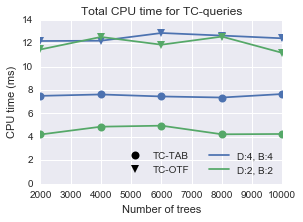

In [6]:
import pylab
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import scipy.signal as signal
import pandas as pd
import collections
from matplotlib import pyplot as plt, gridspec

list_of_files = [
                ("timings--no-dbpath.dat", "No dbpath"),
                ("timings--with-dbpath.dat", "With dbpath")
                ]

# print parsed_kwargs

results_dict = {'with-dbpath':collections.defaultdict(list), 'no-dbpath':collections.defaultdict(list)}
marker_dict = {'with-dbpath':'o', 'no-dbpath':'v'}
# marker_style = dict(linestyle=':', markersize=8)
marker_style = dict(markersize=8)
usecase_set = set()

for k, resd in results_dict.items():
    for filename, ll in list_of_files:
        if k not in filename:
            continue
        data = pd.read_csv(filename, sep=" ", header=None)
        data.columns = ["ntrees", "depth", "nbranches", "timing_mean", "timing_sem"]
        # Now I will sort into "Usecases", given by depth/nbranches.
        for d, b in set((d, b) for d, b in zip(data.depth, data.nbranches)):
            mask = ((data.depth==d) & (data.nbranches==b))
            for ntree, timing, sem in zip(data.ntrees[mask].tolist(), data.timing_mean[mask].tolist(), data.timing_sem[mask].tolist()):
                resd[(d,b)] += [(ntree, timing, sem)]
            usecase_set.add((d,b))

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1, bottom=0.15, left=0.14, right=0.98, top=0.91)

ax = fig.add_subplot(gs[0])
usecase_set = set(((4,4), 
        (2,2)
     )) 
#(2,2)))
ax.plot([],[], marker_dict['with-dbpath'], color='black', label='TC-TAB', **marker_style)
ax.plot([],[], marker_dict['no-dbpath'], color='black', label='TC-OTF', **marker_style)
ax.set_title('Total CPU time for TC-queries')
ax.set_ylabel(r'CPU time (ms)')
ax.set_xlabel(r'Number of trees')
for use_case in usecase_set:
#     print results_dict['with-dbpath'][use_case]
    ntrees, timings, err = map(np.array, zip(*sorted(results_dict['with-dbpath'][use_case])))
    timings *=  1e3 # convert to ms
    err *= 1e3
    label = '-'.join(map(str, use_case)) +'-DBPATH'
    l = ax.errorbar(ntrees, timings, yerr=err, marker=marker_dict['with-dbpath'],  **marker_style)[0]


    ntrees, timings, err = map(np.array, zip(*sorted(results_dict['no-dbpath'][use_case])))
    timings *=  1e3 # convert to ms
    err *= 1e3
    label = '-'.join(map(str, use_case)) +'-OTF'
    ax.errorbar(ntrees, timings, yerr=err, marker=marker_dict['no-dbpath'], color=l.get_color(), **marker_style)
    ax.plot([],[], color=l.get_color(), label='D:{}, B:{}'.format(*use_case), **marker_style)

leg = plt.legend(loc='lower right', ncol=2)
leg.set_alpha(0.9)
plt.ylim(0,)

